<a href="https://colab.research.google.com/github/Udinkosd/Data-Mining-2024/blob/main/Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Gaji Mahasiswa

#**Import Library**

In [754]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import seaborn as sns
from tabulate import tabulate
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis dataset ini adalah untuk memperoleh wawasan tentang faktor-faktor yang memengaruhi gaji karyawan dalam perusahaan. Dengan memeriksa hubungan antara berbagai atribut seperti usia, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, dan tahun pengalaman dengan gaji, perusahaan bertujuan untuk membuat keputusan yang berbasis informasi mengenai strategi kompensasi, akuisisi bakat, dan retensi karyawan.

##**Assess Situation**

Perusahaan perlu memahami faktor-faktor yang berkontribusi terhadap gaji karyawan untuk memastikan praktik kompensasi yang adil, mengidentifikasi area yang perlu ditingkatkan dalam struktur gaji, dan mengatasi potensi disparitas atau bias yang mungkin ada dalam organisasi.

##**Data Mining Goals**

1. Mengidentifikasi faktor-faktor kunci yang memengaruhi gaji karyawan.
2. Menjelajahi hubungan antara berbagai atribut seperti usia, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, dan tahun pengalaman dengan gaji.
3. Mendeteksi pola atau tren dalam distribusi gaji di dalam perusahaan.
4. Mengembangkan model prediktif untuk memperkirakan rentang gaji berdasarkan karakteristik karyawan.

##**Project Plan**

1. Pengumpulan Data: Mengumpulkan dataset yang berisi informasi tentang gaji karyawan, termasuk usia, jenis kelamin, tingkat pendidikan, jabatan pekerjaan, tahun pengalaman, dan gaji.
2. Pra-Pemrosesan Data: Membersihkan data dengan menangani nilai yang hilang, mengkodekan variabel kategorikal, dan menstandarisasi fitur numerik jika diperlukan.
3. Analisis Data Eksploratif (EDA): Melakukan analisis eksploratif untuk memahami distribusi variabel, mengidentifikasi pencilan, dan memvisualisasikan hubungan antara berbagai atribut dengan gaji.
4. Interpretasi dan Wawasan: Menginterpretasikan hasil untuk mendapatkan wawasan yang dapat diambil tentang faktor-faktor yang memengaruhi gaji karyawan dan menyampaikan temuan kepada pemangku kepentingan yang relevan untuk tujuan pengambilan keputusan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

In [755]:
url = 'https://raw.githubusercontent.com/Udinkosd/Data-Mining-2024/main/Salary%20Dataset.csv'
df = pd.read_csv(url)

Sumber data ini merupakan platform Kaggle, dapat diakses melalui tautan berikut: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data

##**Describe Data**

####Informasi Dasar

In [756]:
print("Pratinjau kumpulan data:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

row_count, column_count = df.shape
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Pratinjau kumpulan data:
+---+------+--------+-----------------+-------------------+---------------------+----------+
|   | Age  | Gender | Education Level |     Job Title     | Years of Experience |  Salary  |
+---+------+--------+-----------------+-------------------+---------------------+----------+
| 0 | 32.0 |  Male  |   Bachelor's    | Software Engineer |         5.0         | 90000.0  |
| 1 | 28.0 | Female |    Master's     |   Data Analyst    |         3.0         | 65000.0  |
| 2 | 45.0 |  Male  |       PhD       |  Senior Manager   |        15.0         | 150000.0 |
| 3 | 36.0 | Female |   Bachelor's    |  Sales Associate  |         7.0         | 60000.0  |
| 4 | 52.0 |  Male  |    Master's     |     Director      |        20.0         | 200000.0 |
+---+------+--------+-----------------+-------------------+---------------------+----------+
Number of rows: 375
Number of columns: 6


Dataset ini menampilkan beberapa atribut seperti usia, jenis kelamin, tingkat pendidikan, judul pekerjaan, tahun pengalaman, dan gaji.
Terdapat 375 baris data dan 6 kolom atribut.

####Informasi Lanjutan

In [757]:
# Pratinjau data
print("Informasi lengkap tentang dataset:")
print(df.info())
print()

# Tampilkan jumlah responden untuk setiap tingkat pendidikan dan gender
gender_education_counts = df.groupby(['Gender', 'Education Level']).size()
print("Jumlah responden untuk setiap tingkat pendidikan dan gender:")
print(gender_education_counts)
print()

# Gaji tertinggi, terendah, dan rata-rata serta umur tertua
max_salary = df['Salary'].max()
min_salary = df['Salary'].min()
avg_salary = df['Salary'].mean()
max_age = df['Age'].max()
min_age = df['Age'].min()
avg_age = df['Age'].mean()
max_experience = df['Years of Experience'].max()
min_experience = df['Years of Experience'].min()
avg_experience = df['Years of Experience'].mean()

max_salary_str = '{:,.0f}'.format(max_salary)
min_salary_str = '{:,.0f}'.format(min_salary)
avg_salary_str = '{:,.0f}'.format(avg_salary)
max_age_str = int(max_age)
min_age_str = int(min_age)
avg_age_str = int(avg_age)
max_experience_str = '{:,.0f}'.format(max_experience)
min_experience_str = '{:,.0f}'.format(min_experience)
avg_experience_str = '{:,.2f}'.format(avg_experience)

print("Umur tertua:", max_age_str)
print("Umur termuda:", min_age_str)
print("Umur rata-rata:", avg_age_str)
print()
print("Gaji tertinggi:", max_salary_str)
print("Gaji terendah:", min_salary_str)
print("Gaji rata-rata:", avg_salary_str)
print()
print("Pengalaman kerja tertinggi:", max_experience_str)
print("Pengalaman kerja terendah:", min_experience_str)
print("Rata-rata pengalaman kerja:", avg_experience_str)

Informasi lengkap tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None

Jumlah responden untuk setiap tingkat pendidikan dan gender:
Gender  Education Level
Female  Bachelor's         103
        Master's            50
        PhD                 26
Male    Bachelor's         121
        Master's            48
        PhD                 25
dtype: int64

Umur tertua: 53
Umur termuda: 23
Umur rata-rata: 37

Gaji tertinggi: 250,000
Gaji terendah: 350
Gaji rata-rata: 100,5

1. Age: Menunjukkan usia responden. Ada 373 nilai non-null yang berupa bilangan pecahan (float64).
2. Gender: Menggambarkan jenis kelamin responden. Ada 373 nilai non-null yang berupa objek (string atau teks).
3. Education Level: Merupakan tingkat pendidikan responden. Terdapat 373 nilai non-null yang berupa objek (string).
4. Job Title: Menyatakan judul pekerjaan dari responden. Terdapat 373 nilai non-null yang berupa objek (string).
5. Years of Experience: Menunjukkan tahun-tahun pengalaman kerja responden. Ada 373 nilai non-null yang berupa bilangan pecahan (float64).
6. Salary: Merupakan gaji responden. Terdapat 373 nilai non-null yang berupa bilangan pecahan (float64).

Terdapat dua jenis informasi dalam dataset ini. Pertama, jumlah responden untuk setiap tingkat pendidikan dan gender, yang menunjukkan distribusi jumlah responden berdasarkan tingkat pendidikan dan jenis kelamin. Misalnya, ada 103 wanita dengan gelar sarjana dan 121 pria dengan gelar sarjana.

Kedua, statistik tentang umur, gaji, dan pengalaman kerja dari seluruh dataset. Umur tertua responden adalah 53 tahun dan termuda adalah 23 tahun, dengan umur rata-rata sekitar 37 tahun. Gaji tertinggi mencapai USD250,000  dan yang terendah hanya USD350, dengan rata-rata sekitar USD100,577. Pengalaman kerja tertinggi adalah 25 tahun, terendah 0 tahun atau tanpa pengalaman kerja, dan rata-ratanya adalah sekitar 10.3 tahun.

####Informasi Statistik Deskriptif

In [758]:
# Menampilkan statistik deskriptif dari kolom numerik
print(df.describe())
print()

              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000



Statistik deskriptif ini memberikan gambaran tentang distribusi data dalam kolom-kolom numerik pada dataset. Berikut adalah penjelasan untuk setiap statistik:

1. Count: Menunjukkan jumlah total data yang kita miliki untuk setiap kolom.
2. Mean: Merupakan rata-rata usia, pengalaman kerja, dan gaji dari seluruh data.
3. Std(Standard Deviation): Menunjukkan seberapa jauh rata-rata usia, pengalaman kerja, dan gaji berbeda dari nilai-nilai individu dalam setiap kolom.
4. Min: Merupakan nilai minimum dari usia, pengalaman kerja, dan gaji yang ada dalam data.
5. 25% (Q1): Menunjukkan nilai usia, pengalaman kerja, dan gaji di bawahnya terdapat 25% dari data.
6. 50% (Q2): Merupakan median usia, pengalaman kerja, dan gaji, yang berarti 50% data berada di atasnya dan 50% di bawahnya.
7. 75% (Q3): Menunjukkan nilai usia, pengalaman kerja, dan gaji di bawahnya terdapat 75% dari data.
8. Max: Merupakan nilai maksimum dari usia, pengalaman kerja, dan gaji yang ada dalam data.

Dari data tersebut, kita dapat melihat bahwa usia rata-rata responden adalah sekitar 37 tahun, dengan usia termuda 23 tahun dan tertua 53 tahun. Pendidikan responden bervariasi, dengan mayoritas memiliki gelar sarjana atau gelar master. Jabatan responden juga bervariasi, mulai dari Software Engineer, Data Analyst, hingga Director. Rata-rata pengalaman kerja responden adalah sekitar 10 tahun, dan rata-rata gaji adalah sekitar USD100,577, dengan sebagian besar responden memiliki gaji antara USD55,000 dan USD140,000.

##**Exploratory Data Analysis**

####Informasi Statistik Visual Gender dalam Dataset

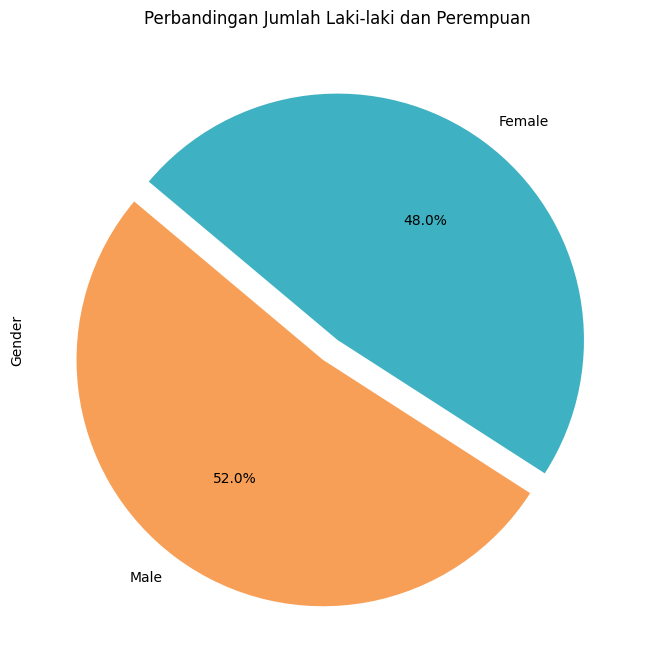

In [759]:
# Menghitung jumlah gender
gender_counts = df['Gender'].value_counts()
colors = ['#f89f57', '#3eb1c2']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Perbandingan Jumlah Laki-laki dan Perempuan')

plt.show()

Dalam data tersebut, terlihat bahwa proporsi responden lulusan laki-laki dan perempuan memiliki perbedaan sekitar 4%. Persentase lulusan laki-laki sebesar 52%, sedangkan persentase lulusan perempuan sebesar 48%. Hal ini mencerminkan variasi gender dalam data, yang meliputi lulusan sarjana maupun gelar master, serta beragam tingkat pengalaman.

####Informasi Statistik Visual Tingkat Pendidikan dalam Dataset

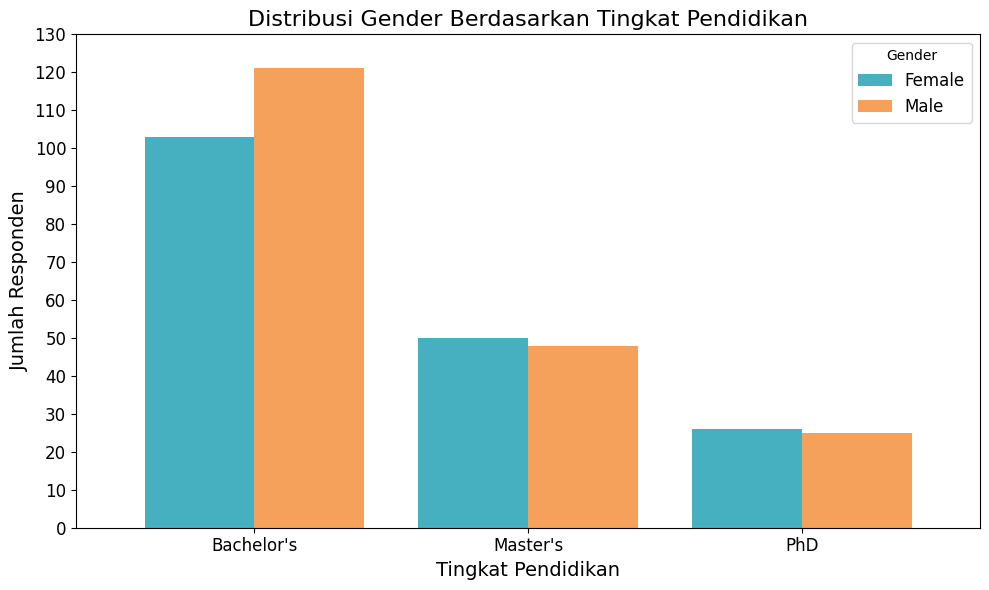

In [760]:
# Hitung jumlah responden berdasarkan tingkat pendidikan dan gender
gender_education_counts = df.groupby(['Education Level', 'Gender']).size().unstack()
ax = gender_education_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#46b0c1', '#f5a15b'])

# Atur label dan judul
plt.title('Distribusi Gender Berdasarkan Tingkat Pendidikan', fontsize=16)
plt.xlabel('Tingkat Pendidikan', fontsize=14)
plt.ylabel('Jumlah Responden', fontsize=14)

# Atur label sumbu x agar horizontal
plt.xticks(rotation=0, fontsize=12)

# Atur label sumbu y agar lebih jelas
plt.yticks(np.arange(0, gender_education_counts.max().max() + 10, 10), fontsize=12)

# Tambahkan legend
plt.legend(title='Gender', fontsize=12)

# Atur layout
plt.tight_layout()

# Tampilkan plot
plt.show()

Berdasarkan visualisasi data distribusi jenis kelamin, terlihat bahwa tidak terdapat perbedaan yang signifikan antara jumlah laki-laki dan perempuan dalam dataset. Dari pie chart, terlihat bahwa sekitar 52% responden adalah laki-laki, sedangkan 48% sisanya adalah perempuan.

Selanjutnya, ketika melihat distribusi berdasarkan tingkat pendidikan, terlihat bahwa mayoritas responden memiliki gelar sarjana (Bachelor's), diikuti oleh gelar master (Master's) dan gelar doktor (PhD). Meskipun demikian, terdapat perbedaan kecil antara jumlah laki-laki dan perempuan dalam setiap tingkat pendidikan. Pada tingkat pendidikan sarjana, terdapat sedikit lebih banyak laki-laki daripada perempuan, sementara pada tingkat pendidikan master dan doktor, jumlah perempuan sedikit lebih banyak daripada laki-laki.

####Informasi Statistik Visual Gaji berdasarkan Jenis Kelamin dalam Dataset

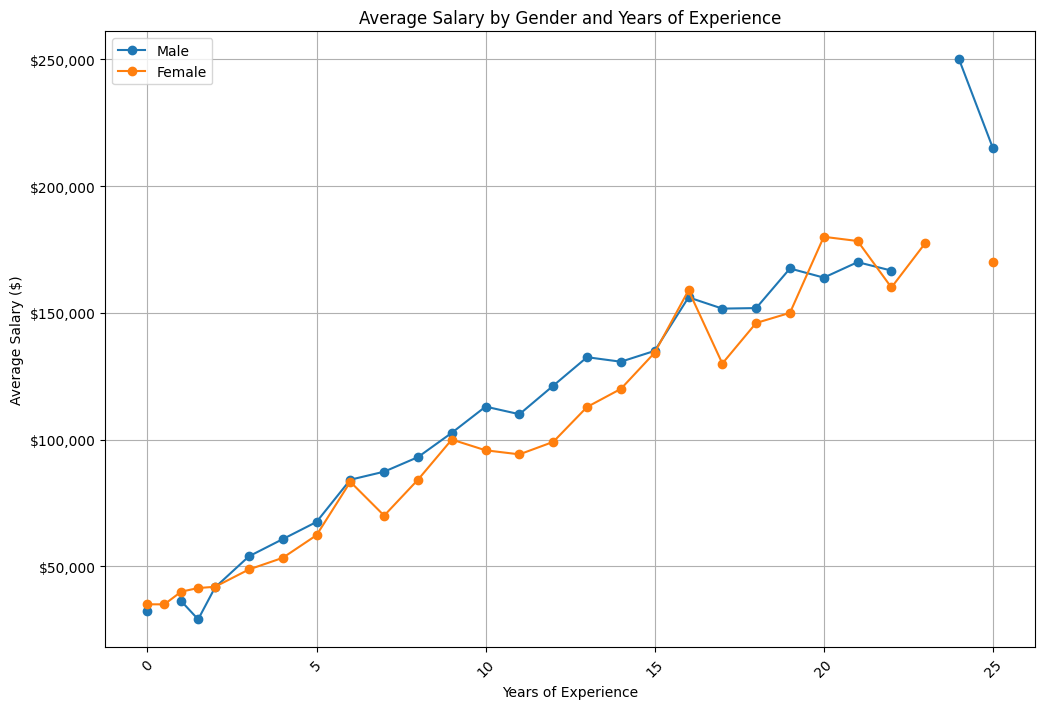

In [761]:
avg_salary = df.groupby(['Gender', 'Years of Experience'])['Salary'].mean().unstack()

# Plot the data
plt.figure(figsize=(12, 8))

male_data = avg_salary.loc['Male']
plt.plot(male_data.index, male_data, marker='o', label='Male')

female_data = avg_salary.loc['Female']
plt.plot(female_data.index, female_data, marker='o', label='Female')

plt.title('Average Salary by Gender and Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

Pada data di atas, terlihat bahwa rata-rata gaji berdasarkan pengalaman kerja menunjukkan variasi yang signifikan. Gaji tertinggi mencapai USD250,000 pertahun, sementara yang terendah berada di bawah USD50,000 pertahun. Data ini menunjukkan bahwa semakin tinggi pengalaman kerja seseorang, semakin tinggi pula gaji yang diterima, baik untuk perempuan maupun laki-laki.

Selain itu, tidak terdapat perbedaan gaji yang signifikan antara jenis kelamin dalam dataset ini. Namun, perlu diperhatikan bahwa meskipun terlihat perbedaan gaji meski memiliki pengalaman yang sama, hal itu dipengaruhi oleh perbedaan posisi yang dipegang oleh responden di perusahaan masing-masing. Sebagai contoh, dalam data tersebut, terlihat bahwa laki-laki memiliki gaji lebih tinggi dibandingkan dengan perempuan. Perbedaan ini dipengaruhi oleh faktor seperti gelar lulusan dan posisi dalam perusahaan, di mana laki-laki mungkin menduduki posisi CEO sedangkan perempuan adalah Direktur.

####Informasi Statistik Visual Gaji berdasarkan Tingkat Pendidikan dan Pengalaman Kerja dalam Dataset

<Figure size 1200x800 with 0 Axes>

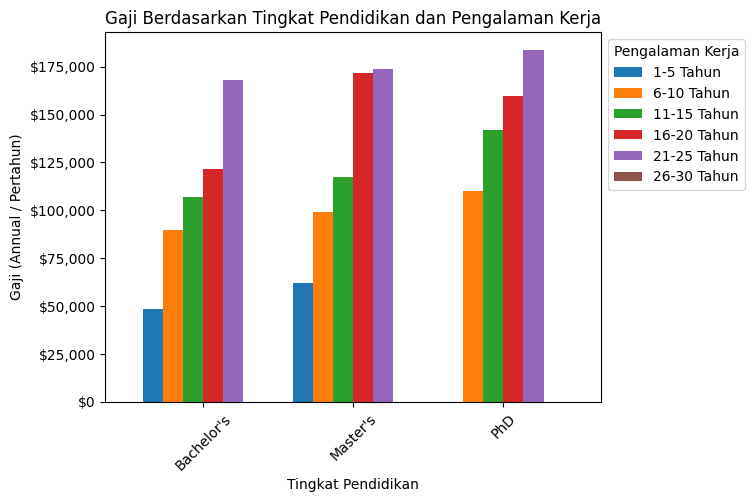

In [762]:
# Plot bar chart
plt.figure(figsize=(12, 8))
education_experience_salary.plot(kind='bar', stacked=False, width=0.8)
plt.title('Gaji Berdasarkan Tingkat Pendidikan dan Pengalaman Kerja')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Gaji (Annual / Pertahun)')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Menambahkan legend di luar chart
plt.legend(title='Pengalaman Kerja', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan data tersebut, kita dapat melihat bahwa setiap tingkat gelar memiliki pengaruh terhadap peringkat gaji bagi para lulusannya. Pertama-tama, mari kita perhatikan lulusan sarjana. Dengan pengalaman kerja antara 1 hingga 5 tahun, gaji rata-rata mereka mendekati USD50,000 per tahun. Namun, bagi mereka dengan pengalaman kerja lebih dari 6 tahun, gaji rata-rata sudah mencapai sekitar USD90,000 per tahun. Gaji tertinggi untuk lulusan sarjana adalah USD170,000 per tahun.

Selanjutnya, lulusan magister dan doktor memiliki gaji per tahun yang tidak terlalu berbeda secara signifikan dengan tingkat pengalaman kerja yang sama. Meskipun demikian, terdapat beberapa responden yang telah mencapai gaji USD250,000 per tahun dengan gelar doktor dan waktu pengalaman kerja yang setara dengan gelar lainnya.

Selain itu, tidak terlihat bahwa ada doktor dengan pengalaman di bawah 6 tahun dan tidak ada pula lulusan yang memiliki pengalaman lebih dari 25 tahun. Adapun kesimpulannya, semakin tinggi gelar yang dimiliki, semakin tinggi pula gaji yang mereka terima, meskipun tidak terdapat perbedaan yang signifikan.

####Informasi Statistik Visual Korelasi antara Kolom Data dalam Dataset

<ipython-input-763-74448cf42441>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



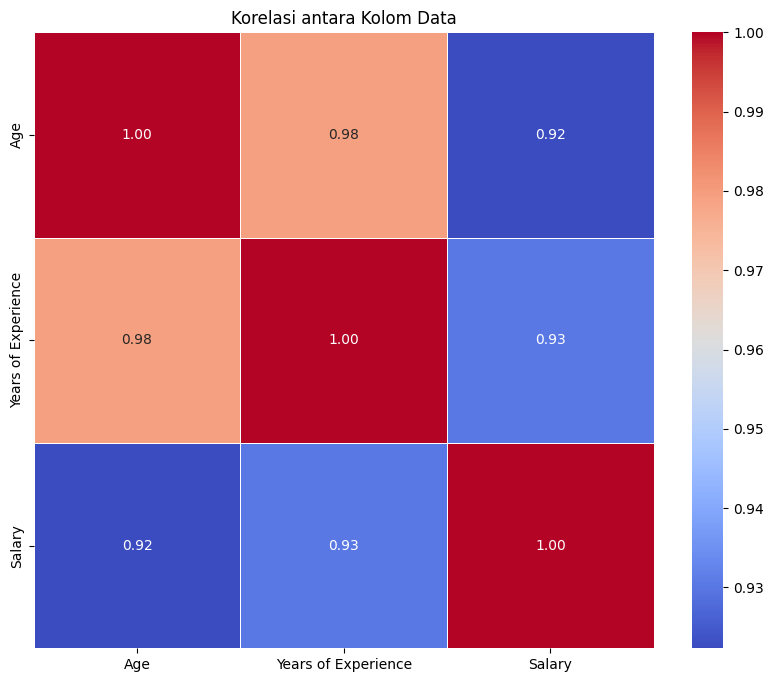

In [763]:
# Membuat heatmap korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Kolom Data')
plt.show()

Berdasarkan korelasi yang diamati dalam data tersebut, dapat disimpulkan bahwa terdapat hubungan yang kuat antara beberapa variabel utama. Pertama, terdapat korelasi yang sangat tinggi antara usia seseorang dan jumlah tahun pengalaman kerja yang dimiliki. Hal ini menunjukkan bahwa semakin tua seseorang, semakin banyak pengalaman kerja yang mereka miliki.

Selanjutnya, terdapat korelasi yang kuat antara usia dan tingkat gaji yang diterima seseorang. Artinya, semakin tua seseorang, cenderung semakin tinggi pula gaji yang mereka terima. Selain itu, korelasi antara jumlah tahun pengalaman kerja dan tingkat gaji juga cukup signifikan. Semakin lama seseorang memiliki pengalaman kerja, semakin besar kemungkinan mereka mendapatkan gaji yang lebih tinggi.

Dengan demikian, dari korelasi ini dapat disimpulkan bahwa usia, tahun pengalaman, dan gaji saling terkait secara positif, dimana semakin tua dan berpengalaman seseorang, cenderung mendapatkan gaji yang lebih tinggi.

##**Verify Data Quality**

####Missing Values

In [764]:
# Mengecek apakah ada nilai kosong pada tiap kolom
missing_values = df.isnull().sum()
print("Kolom dengan nilai kosong:")
print(missing_values[missing_values > 0])

Kolom dengan nilai kosong:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


Dari hasil pengecekan nilai kosong, terdapat beberapa kolom dalam dataset yang memiliki nilai kosong. Kolom-kolom tersebut meliputi usia responden, jenis kelamin, tingkat pendidikan, jabatan, tahun pengalaman kerja, gaji, dan interval pengalaman. Kehadiran nilai kosong dalam kolom-kolom ini bisa berdampak pada analisis yang bergantung pada informasi tersebut. Misalnya, ketiadaan nilai pada kolom usia atau gaji dapat memengaruhi pemahaman tentang demografi responden atau analisis kompensasi.

####Outliers Values

In [765]:
# Pilih kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Menghitung IQR untuk setiap kolom numerik
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari outlier values untuk setiap kolom numerik
outliers = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)

# Menampilkan outlier values untuk setiap kolom
print("Outlier Values:")
print(outliers.sum())

Outlier Values:
Age                    0
Years of Experience    0
Salary                 0
dtype: int64


Dalam dataset tersebut, tidak ditemukan outlier values dalam kolom Age, Years of Experience, dan Salary. Ini menunjukkan bahwa tidak ada nilai ekstrim atau tidak biasa dalam data untuk ketiga kolom tersebut.

####Duplicated Values

In [766]:
# Mencari nilai-nilai yang diduplikasi dalam dataset
duplicated_values = df[df.duplicated()]

# Menampilkan nilai-nilai yang diduplikasi
print("Duplicated Values:")
print(duplicated_values)

Duplicated Values:
      Age  Gender Education Level                              Job Title  \
195  28.0    Male      Bachelor's                Junior Business Analyst   
250  30.0  Female      Bachelor's           Junior Marketing Coordinator   
251  38.0    Male        Master's                   Senior IT Consultant   
252  45.0  Female             PhD                Senior Product Designer   
253  28.0    Male      Bachelor's  Junior Business Development Associate   
254  35.0  Female      Bachelor's               Senior Marketing Analyst   
255  44.0    Male      Bachelor's               Senior Software Engineer   
256  34.0  Female        Master's               Senior Financial Advisor   
257  35.0    Male      Bachelor's             Senior Project Coordinator   
258  50.0  Female             PhD                 Director of Operations   
260   NaN     NaN             NaN                                    NaN   
262  46.0    Male             PhD                  Senior Data Scient

Berdasarkan hasil pengecekan nilai duplikat dalam dataset, ditemukan bahwa beberapa baris memiliki nilai yang sama untuk setiap kolom, khususnya pada atribut yang berkaitan langsung dengan analisis gaji seperti 'Job Title', 'Years of Experience', dan 'Salary'. Dalam konteks dataset yang menunjukkan informasi gaji para lulusan, adanya duplikasi data seperti ini diharapkan dan tidak dianggap sebagai masalah yang mengganggu analisis.

####Inconsistent Values / Noise (Optional)

#**DATA CLEANING**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [767]:
print((df.isna().sum() / len(df)) * 100)

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64


In [768]:
df[df['Age'].isnull()]
df[df['Gender'].isnull()]
df[df['Education Level'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


Dalam pengecekan tersebut, ditemukan missing value sebesar 53.33% atau kurang dari 70%, maka langkah yang diambil adalah melakukan imputasi terhadap missing value tersebut. Adapun langkahnya adalah sebagai berikut ini.

#####**Imputasi Missing Values**

In [769]:
mode_education = df['Education Level'].mode()[0]
df['Education Level'].fillna(mode_education, inplace=True)

In [770]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

mean_experience = df['Years of Experience'].mean()
df['Years of Experience'].fillna(mean_experience, inplace=True)

mean_salary = df['Salary'].mean()
df['Salary'].fillna(mean_salary, inplace=True)

Disini kita akan melakukan imputasi missing value dengan menggunakan mean / nilai rata-rata, yaitu:

Mode (Modus) untuk 'Education Level': Digunakan untuk mengisi nilai yang hilang dalam kolom 'Education Level'. Yaitu dengan mencari nilai modus pada kolom Education Level.

Mean (Rata-rata) untuk 'Age', 'Years of Experience', dan 'Salary': Digunakan untuk mengisi nilai yang hilang dalam kolom 'Age', 'Years of Experience', dan 'Salary'. Rata-rata adalah jumlah dari semua nilai dalam suatu kolom dibagi dengan jumlah total nilai. Cara ini adalah pendekatan umum untuk mengisi nilai yang hilang ketika data terdistribusi secara normal.

#####**Pengecekkan Ulang**

In [771]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Age,0.000000
Gender,0.533333
Education Level,0.000000
Job Title,0.533333
Years of Experience,0.000000
Salary,0.000000


Output tersebut menunjukkan persentase nilai yang hilang (missing values) dalam setiap kolom DataFrame, diukur sebagai persentase dari total jumlah baris DataFrame.

Age: Tidak ada nilai yang hilang (0.0000%)
Gender dan Job Title: Masing-masing memiliki 0.5333% nilai yang hilang.
Education Level, Years of Experience, dan Salary: Tidak ada nilai yang hilang (0.0000%).

secara umum, persentase nilai yang hilang sekitar 0.5333% masih dapat diterima. Meskipun keputusan akhir kembali kepada tujuan penelitian data.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [772]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns:")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns:
           Age  Gender Education Level                              Job Title  \
195  28.000000    Male      Bachelor's                Junior Business Analyst   
250  30.000000  Female      Bachelor's           Junior Marketing Coordinator   
251  38.000000    Male        Master's                   Senior IT Consultant   
252  45.000000  Female             PhD                Senior Product Designer   
253  28.000000    Male      Bachelor's  Junior Business Development Associate   
254  35.000000  Female      Bachelor's               Senior Marketing Analyst   
255  44.000000    Male      Bachelor's               Senior Software Engineer   
256  34.000000  Female        Master's               Senior Financial Advisor   
257  35.000000    Male      Bachelor's             Senior Project Coordinator   
258  50.000000  Female             PhD                 Director of Operations   
260  37.431635     NaN      Bachelor's          

Berdasarkan hasil pengecekan nilai duplikat dalam dataset, ditemukan bahwa beberapa baris memiliki nilai yang sama untuk setiap kolom, khususnya pada atribut yang berkaitan langsung dengan analisis gaji seperti 'Job Title', 'Years of Experience', dan 'Salary'. Dalam konteks dataset yang menunjukkan informasi gaji para lulusan, adanya duplikasi data seperti ini diharapkan dan tidak dianggap sebagai masalah yang mengganggu analisis. Sehingga langkah ini dapat dilewati.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [773]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.0
Years of Experience,0.0
Salary,0.0


Dalam dataset tersebut, tidak ditemukan outlier values dalam kolom Age, Years of Experience, dan Salary. Ini menunjukkan bahwa tidak ada nilai ekstrim atau tidak biasa dalam data untuk ketiga kolom tersebut. Sehingga langkah ini dapat dilewati.

#**CONSTRUCT DATA**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [774]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [775]:
# Melihat seluruh Job Title
job_titles = df['Job Title'].unique()
print("Seluruh Job Titles:")
print(job_titles)

# Menghitung jumlah duplikat untuk setiap Job Title
duplicate_counts = df['Job Title'].value_counts()
print("\nJumlah duplikat untuk setiap Job Title:")
print(duplicate_counts)

Seluruh Job Titles:
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator'

In [776]:
def categorize_job_title(title):
    engineering_titles = ['Software Engineer', 'Data Analyst', 'Software Developer', 'IT Support', 'Network Engineer', 'Web Developer']
    management_titles = ['Senior Manager', 'Director', 'Product Manager', 'Operations Manager', 'Project Manager', 'Business Analyst', 'Business Development Manager', 'Marketing Manager']
    finance_titles = ['Financial Analyst', 'Accountant', 'Financial Manager', 'Chief Financial Officer (CFO)']
    marketing_titles = ['Marketing Coordinator', 'Social Media Specialist', 'Graphic Designer', 'Copywriter', 'Content Marketing Manager']
    hr_customer_service_titles = ['HR Manager', 'Recruiter', 'Customer Service Representative', 'Customer Service Manager', 'Customer Success Manager']

    if title in engineering_titles:
        return 'Engineering'
    elif title in management_titles:
        return 'Management'
    elif title in finance_titles:
        return 'Finance'
    elif title in marketing_titles:
        return 'Marketing'
    elif title in hr_customer_service_titles:
        return 'HR & Customer Service'
    else:
        return 'Other'

df['JobCategory'] = df['Job Title'].apply(categorize_job_title)

Di sini, kita akan mengelompokkan 'Job Title' / pekerjaan ke dalam 6 jenis, yaitu:

1. Engineering & IT: Termasuk Software Engineer, Data Analyst, Software 2.Developer, IT Support, Network Engineer, Web Developer, dll.
2. Manajemen dan Bisnis: Meliputi Senior Manager, Director, Product Manager, Operations Manager, Project Manager, Business Analyst, Business Development Manager, Marketing Manager, dll.
3. Keuangan dan Akuntansi: Seperti Financial Analyst, Accountant, Financial
4. Manager, Chief Financial Officer (CFO), dll.
Pemasaran dan Kreativitas: Contohnya Marketing Coordinator, Social Media Specialist, Graphic Designer, Copywriter, Content Marketing Manager, dll.
5. Sumber Daya Manusia (HR) dan Layanan Pelanggan: Termasuk HR Manager, Recruiter, Customer Service Representative, Customer Success Manager, dll.
6. Other jika tidak disebutkan.

In [777]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

Pada tahap ini, kita akan melakukan pengkategorian usia ke dalam tiga kategori: 'Child', 'Adult', dan 'Elderly'. Karena dataset ini memiliki banyak data, pembagian usia ini akan membantu dalam analisis lebih lanjut.

###**Pengecekkan Hasil**

In [778]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,JobCategory,AgeCategory
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Engineering,Adult
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Engineering,Adult
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Management,Adult
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Other,Adult
4,52.0,Male,Master's,Director,20.0,200000.0,Management,Adult


In [779]:
df['AgeCategory'].value_counts()
df['JobCategory'].value_counts()

Other                    337
Management                13
HR & Customer Service      8
Engineering                7
Marketing                  7
Finance                    3
Name: JobCategory, dtype: int64

Hasil ini menunjukkan bahwa tidak terdapat kategori selain 'Adult' dan 'Elderly' yang artinya rata-rata usianya adalah 18 hingga 60 tahun lebih.

#**DATA REDUCTION**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [780]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Pada tahap pengurangan fitur ini, kita dapat melewatinya karena tidak ada fitur yang dianggap tidak relevan. Semua fitur, mulai dari Age, Gender, Education, Job Title, Years of Experience, hingga Salary, dianggap penting dan relevan untuk analisis. Oleh karena itu, tidak perlu melakukan pengurangan fitur. Semua informasi yang tersedia dapat dimanfaatkan sepenuhnya dalam pemodelan atau analisis yang akan dilakukan. Selanjutnya, kita dapat melanjutkan ke tahap berikutnya dalam proses analisis data.

###**Mapping**

In [781]:
df['AgeCategory'] = df['AgeCategory'].map({'Child': 0, 'Adult': 1, 'Elder': 2}).fillna(1).astype(int)

In [782]:
df['JobCategory'] = df['JobCategory'].map({'Engineering': 0, 'Management': 1, 'Finance': 2, 'Marketing': 3, 'HR & Customer Service': 4, 'Other': 5}).fillna(5).astype(int)

In [783]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,JobCategory,AgeCategory
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,5,1
4,52.0,Male,Master's,Director,20.0,200000.0,1,1


Ini adalah penambahan kolom baru dalam dataframe yang menunjukkan kategori usia berdasarkan nilai 'Child', 'Adult', dan 'Elder' pada kolom 'AgeCategory', serta kategori pekerjaan berdasarkan berbagai judul pekerjaan pada kolom 'JobCategory'.

Selanjutnya, kolom tersebut dipecah menjadi beberapa kolom biner untuk setiap kategori usia, misalnya 'AgeCategory_1' untuk kategori 'Child', 'AgeCategory_2' untuk kategori 'Adult', dan 'AgeCategory_3' untuk kategori 'Elder'. Kolom-kolom biner ini menunjukkan apakah suatu data berada dalam kategori usia tertentu atau tidak.

Dan Kolom 'JobCategory' juga dipecah menjadi kolom biner untuk setiap kategori pekerjaan, seperti 'JobCategory_0' untuk kategori 'Engineering', 'JobCategory_1' untuk kategori 'Management', dan seterusnya. Hal ini memudahkan dalam analisis data dengan mempertimbangkan peran pekerjaan dalam pemodelan data dan pengambilan keputusan.

#**DATA TRANSFORMATION**

###**Mapping**

In [784]:
# Melakukan one-hot encoding pada kolom 'Age'
df = pd.concat([df, pd.get_dummies(df['AgeCategory'], prefix='AgeCategory')], axis=1)

In [785]:
# Melakukan one-hot encoding pada kolom 'Gender'
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)

In [786]:
# Melakukan one-hot encoding pada kolom 'Job'
df = pd.concat([df, pd.get_dummies(df['JobCategory'], prefix='JobCategory')], axis=1)

In [787]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,JobCategory,AgeCategory,AgeCategory_1,Gender_Female,Gender_Male,JobCategory_0,JobCategory_1,JobCategory_2,JobCategory_3,JobCategory_4,JobCategory_5
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,1,1,0,1,1,0,0,0,0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,1,1,0,1,0,0,0,0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,1,1,0,1,0,1,0,0,0,0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,5,1,1,1,0,0,0,0,0,0,1
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,5,1,1,1,0,0,0,0,0,0,1
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,5,1,1,0,1,0,0,0,0,0,1
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,5,1,1,1,0,0,0,0,0,0,1
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,5,1,1,0,1,0,0,0,0,0,1


Pada tahap ini, dilakukan proses transformasi data menggunakan one-hot encoding untuk dua kolom, yaitu 'AgeCategory' dan 'Gender'.

One-hot encoding pada kolom 'AgeCategory':

Dengan menggunakan pd.get_dummies, kolom 'AgeCategory' yang berisi kategori usia (misalnya 'Child', 'Adult', 'Elder') diubah menjadi kolom-kolom baru dengan nilai biner (0 atau 1) yang menunjukkan keanggotaan suatu data dalam setiap kategori usia.
Prefix 'AgeCategory_' digunakan untuk memberi nama pada kolom baru yang dihasilkan dari one-hot encoding.

Sama seperti pada kolom 'AgeCategory', kolom 'Gender' yang berisi jenis kelamin ('Male' atau 'Female') diubah menjadi kolom-kolom baru dengan nilai biner yang menunjukkan jenis kelamin responden.
Prefix 'Gender_' digunakan untuk memberi nama pada kolom baru yang dihasilkan dari one-hot encoding.

###**Encoding**

In [788]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [789]:
df.head()

,Age,Years of Experience,Salary,JobCategory,AgeCategory,AgeCategory_1,Gender_Female,Gender_Male,JobCategory_0,JobCategory_1,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Setelah kedua kolom tersebut di-transformasikan menggunakan one-hot encoding, hasilnya adalah dataframe baru dengan tambahan kolom-kolom biner yang merepresentasikan kategori usia dan jenis kelamin dari setiap responden. Hal ini mempermudah analisis dan pemodelan data, terutama ketika menggunakan algoritma pembelajaran mesin yang memerlukan fitur-fitur dalam bentuk biner.

In [790]:
df.to_csv('/content/drive/My Drive/Data Cleaned.csv', index=False)